In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.feature_extraction import text
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('movie_reviews.tsv',sep='\t')

In [3]:
df.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [4]:
data=df.review.tolist()

In [5]:
cv=text.CountVectorizer(data,max_features=5000)
x=cv.fit_transform(data)

In [6]:
x.shape

(25000, 5000)

In [7]:
y=df.sentiment
y.shape

(25000,)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [10]:
clf = LogisticRegression()
mod=clf.fit(x_train,y_train)

In [11]:
pred=mod.predict(x_test)

In [12]:
pred

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [13]:
from sklearn.metrics import classification_report

In [14]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      2548
           1       0.85      0.86      0.86      2452

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000



In [15]:
from sklearn.metrics import confusion_matrix

In [33]:
y_test

14149    0
8946     1
22378    0
12162    0
4879     0
        ..
4022     1
17601    1
4718     1
9376     0
8019     1
Name: sentiment, Length: 5000, dtype: int64

In [32]:
pred

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [16]:
print(confusion_matrix(y_test,pred))

[[2180  368]
 [ 343 2109]]


In [17]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [18]:
print(roc_auc_score(y_test,pred))

0.8578435954630315


In [19]:
pred1=mod.predict(x_train)

In [20]:
pred1

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [21]:
print(roc_auc_score(y_train,pred1))

0.9767941853380302


In [22]:
from sklearn import model_selection

In [23]:
grid=model_selection.GridSearchCV(mod,{"C":np.random.uniform(0,120,2)})

In [24]:
grid.fit(x_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([ 37.86649926, 119.20803558])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [25]:
grid.best_params_

{'C': 37.86649926109392}

In [26]:
grid.best_score_

0.836

In [27]:
y_score=clf.fit(x_train,y_train).decision_function(x_test)

In [28]:
roc=roc_curve(y_test,y_score)


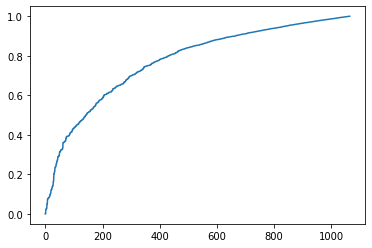

In [29]:
plt.plot(roc[1])

#dfdss